In [399]:
# import modules
from dotenv import load_dotenv, find_dotenv
import tweepy
import pandas as pd
import os

load_dotenv(find_dotenv())

True

In [400]:
# set online authentication
auth = tweepy.OAuth1UserHandler(os.getenv('consumer_key'), os.getenv('consumer_secret'))
auth.set_access_token (os.getenv('access_token'), os.getenv('access_token_secret'))

# seting up Oauth 2.0 Bearer Token
#auth = tweepy.OAuth2BearerHandler(os.getenv('bearer_token'))

# calling the API
api = tweepy.API(auth)

In [401]:
screen_name = "elonmusk"

# Returns information about the specified user
user = api.get_user(screen_name = screen_name)


In [402]:
# printing the information
print("The id is : " + str(user.id))
print("The id_str is : " + user.id_str)
print("The name is : " + user.name)
print("The screen_name is : " + user.screen_name)
print("The location is : " + str(user.location))
print("The profile_location is : " + str(user.profile_location))
print("The description is : " + user.description)

The id is : 44196397
The id_str is : 44196397
The name is : Elon Musk
The screen_name is : elonmusk
The location is : 
The profile_location is : None
The description is : Mars & Cars, Chips & Dips


In [403]:
screen_name = 'elonmusk'
search_term = 'cpi data'
tweet_amount = 200
tweets = []
likes = []
time = []

# return most recent status posted
'''
data = tweepy.Cursor(api.user_timeline,
                       screen_name = screen_name,
                       tweet_mode='extended',
                       ).items(tweet_amount)


# return most recent search word
'''
data = tweepy.Cursor(api.search_tweets,
                       q = search_term,
                       lang='en',
                       tweet_mode='extended',
                       ).items(tweet_amount)


# getting data into a lists
for tweet in data:
    #print(tweet.text)
    tweets.append(tweet.full_text)
    likes.append(tweet.favorite_count)
    time.append(tweet.created_at)


In [404]:
# cleaning tweets, removing @ 

tweets_final = []

for tweet in tweets:
    #final_text = tweet.replace('RT', '')       # RT are removed in the FB
    final_text = tweet.replace('&amp;', 'and')
    while final_text.startswith('@'):
            position = final_text.index(' ')
            final_text = final_text[position+1:]        

    print(final_text)
    tweets_final.append(final_text)


    



RT @Nigel__DSouza: Dow futures tumble 300 points after much hotter-than-expected inflation report 😢 

Inflation data 😟 

🇺🇸 June CPI at 9.1…
RT @thedailydegenhq: The Daily Degen - Wednesday, July 13th, 2022

CPI Print, Huge Gainers, Max Podcast Alpha, And Several Really Interesti…
RT @MarketWatch: White House calls attention to falling gas prices not reflected in June CPI data https://t.co/q3XSytY4jg
RT @joshbivens_DC: Today’s inflation data showed continued rapid growth in the overall CPI, rising 9.1% year over year. A similar reading l…
you mean the averages such as Nasdaq? 
they show an expected knee jerk reaction and will end the year negative
the dollar will peak this quarter
CPI has peaked
oil markets will remain tight going forward, regardless of people pulling one another over every data point
crypto watching CPI data come in https://t.co/VQPmCfZkC7
RT @joshbivens_DC: Today’s inflation data showed continued rapid growth in the overall CPI, rising 9.1% year over year. A similar 

In [405]:
# create data frame
df = pd.DataFrame({'tweets':tweets_final,'likes':likes,'time':time})

# removing retweets
df = df[~df.tweets.str.contains("RT")]

# removing links
df = df[~df.tweets.str.contains("http")]

# reset index
df = df.reset_index(drop=True)

# most like tweetsmostlike = df.loc[df.likes.nlargest(10).index]

In [406]:
# import modules
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load("en_core_web_sm")
import seaborn as sns


In [407]:
# pass to a list
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [408]:
## sentiment analysis 
from textblob import TextBlob

polarity = 0

positive = 0
neutral = 0
negative = 0

for raw_text in df.tweets:
    analysis = TextBlob(raw_text)
    tweet_polarity = analysis.polarity
    if tweet_polarity > 0.00:
        positive += 1
    elif tweet_polarity < 0.00:
        negative += 1
    elif tweet_polarity == 0.00:
        neutral += 1
    polarity += tweet_polarity


print(polarity)
print(positive)
print(negative)
print(neutral)

0.40162878787878814
22
17
12


In [409]:
# remove punctuaction
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
 
lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)


In [410]:
# stemming the words to their word root
from nltk.stem.snowball import SnowballStemmer 
from nltk.stem.wordnet import WordNetLemmatizer


s_wnl = WordNetLemmatizer()
s_stemmer = SnowballStemmer(language='english')

stem = []

for word in lines2:
    s_wnl.lemmatize(word) if s_wnl.lemmatize(word).endswith('e') else s_stemmer.stem(word)
    stem.append(word)
    #stem.append(s_wnl.lemmatize(word))
    


stem

['you',
 'mean',
 'the',
 'averages',
 'such',
 'as',
 'Nasdaq',
 'they',
 'show',
 'an',
 'expected',
 'knee',
 'jerk',
 'reaction',
 'and',
 'will',
 'end',
 'the',
 'year',
 'negative',
 'the',
 'dollar',
 'will',
 'peak',
 'this',
 'quarter',
 'CPI',
 'has',
 'peaked',
 'oil',
 'markets',
 'will',
 'remain',
 'tight',
 'going',
 'forward',
 'regardless',
 'of',
 'people',
 'pulling',
 'one',
 'another',
 'over',
 'every',
 'data',
 'point',
 'Can',
 'mess',
 'around',
 'and',
 'make',
 'this',
 'a',
 'thread',
 'about',
 'PA',
 'before',
 'and',
 'after',
 'monthly',
 'cpi',
 'data',
 'release',
 'DIIs',
 'are',
 'speculators',
 'otherwise',
 'why',
 'they',
 'will',
 'buy',
 'this',
 'big',
 'compare',
 'to',
 'last',
 'few',
 'days',
 'of',
 'their',
 'buying',
 'when',
 'US',
 'CPI',
 'data',
 'was',
 'due',
 'for',
 'today',
 'Oil',
 'copper',
 'all',
 'bottoming',
 'CPI',
 'is',
 'lagging',
 'and',
 'old',
 'data',
 'As',
 'I',
 'frequently',
 'write',
 'the',
 '1st',
 'reacti

In [411]:
# remov all stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))
stem2 = []

for word in stem:
    if word.casefold() not in stop_words:
        stem2.append(word)

stem2

['mean',
 'averages',
 'Nasdaq',
 'show',
 'expected',
 'knee',
 'jerk',
 'reaction',
 'end',
 'year',
 'negative',
 'dollar',
 'peak',
 'quarter',
 'CPI',
 'peaked',
 'oil',
 'markets',
 'remain',
 'tight',
 'going',
 'forward',
 'regardless',
 'people',
 'pulling',
 'one',
 'another',
 'every',
 'data',
 'point',
 'mess',
 'around',
 'make',
 'thread',
 'PA',
 'monthly',
 'cpi',
 'data',
 'release',
 'DIIs',
 'speculators',
 'otherwise',
 'buy',
 'big',
 'compare',
 'last',
 'days',
 'buying',
 'US',
 'CPI',
 'data',
 'due',
 'today',
 'Oil',
 'copper',
 'bottoming',
 'CPI',
 'lagging',
 'old',
 'data',
 'frequently',
 'write',
 '1st',
 'reaction',
 'data',
 'CPI',
 'FOMC',
 'especially',
 'often',
 'always',
 'trap',
 'Bears',
 'happy',
 'night',
 'data',
 'US',
 'headline',
 'CPI',
 'goes',
 '9',
 '86',
 'last',
 'month',
 'core',
 'inflation',
 'comes',
 '59',
 '6',
 'Core',
 'decelerating',
 'even',
 'though',
 'slowly',
 'early',
 'say',
 'trends',
 'looking',
 'commodities',
 '

In [412]:
# delete all x elements from a list and the search words
search_split = search_term.split()

# add words to remove
to_delete = ['im']

delete_list = to_delete + search_split
new_list = []

for word in stem2:
    if word.casefold() not in delete_list:
        new_list.append(word)

new_list

['mean',
 'averages',
 'Nasdaq',
 'show',
 'expected',
 'knee',
 'jerk',
 'reaction',
 'end',
 'year',
 'negative',
 'dollar',
 'peak',
 'quarter',
 'peaked',
 'oil',
 'markets',
 'remain',
 'tight',
 'going',
 'forward',
 'regardless',
 'people',
 'pulling',
 'one',
 'another',
 'every',
 'point',
 'mess',
 'around',
 'make',
 'thread',
 'PA',
 'monthly',
 'release',
 'DIIs',
 'speculators',
 'otherwise',
 'buy',
 'big',
 'compare',
 'last',
 'days',
 'buying',
 'US',
 'due',
 'today',
 'Oil',
 'copper',
 'bottoming',
 'lagging',
 'old',
 'frequently',
 'write',
 '1st',
 'reaction',
 'FOMC',
 'especially',
 'often',
 'always',
 'trap',
 'Bears',
 'happy',
 'night',
 'US',
 'headline',
 'goes',
 '9',
 '86',
 'last',
 'month',
 'core',
 'inflation',
 'comes',
 '59',
 '6',
 'Core',
 'decelerating',
 'even',
 'though',
 'slowly',
 'early',
 'say',
 'trends',
 'looking',
 'commodities',
 'prices',
 'fallen',
 'late',
 'get',
 'iBonds',
 'Dollar',
 'Phil',
 'See',
 'new',
 'June',
 'bad',
 

In [413]:
df = pd.DataFrame(new_list)

# group the words
df = df[0].value_counts()

In [414]:
# frecuencies of the words
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 398, 2: 66, 3: 28, 4: 12, 6: 3, 5: 3, 12: 2, 10: 2, 20: 1})

In [415]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\imont\anaconda3\envs\django2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


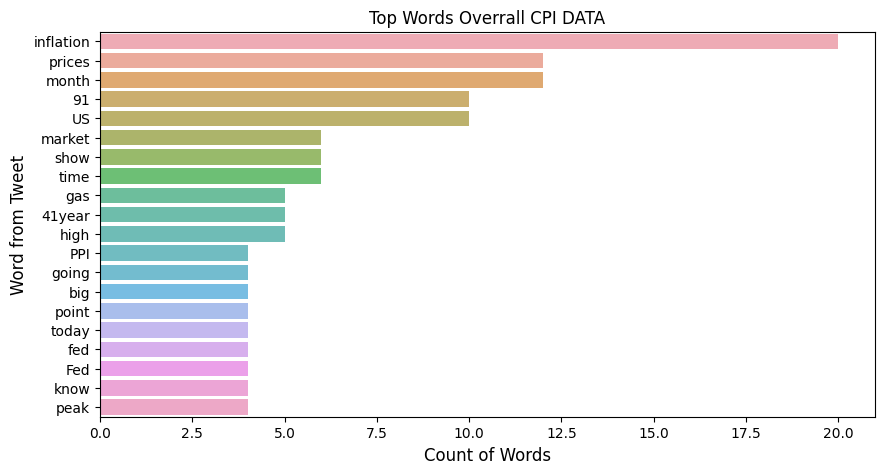

In [416]:
# simple plot that shows the top 20 words being used

df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overrall ' + search_term.upper())
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [417]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [418]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text +  ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label)))

In [419]:
str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


c:\Users\imont\anaconda3\envs\django2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


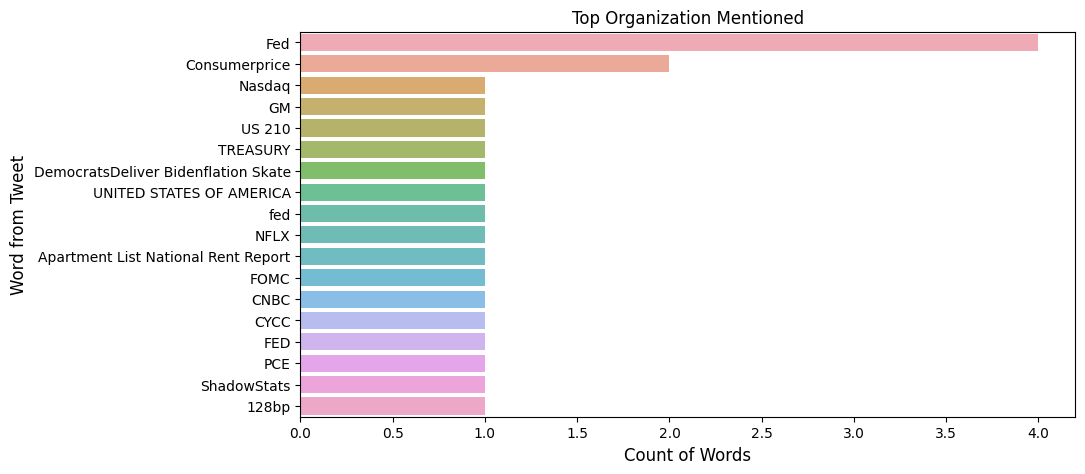

In [420]:
# simple plot that shows the top organiations

df = df7[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organization Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [421]:
# top persons he is talking aobut

str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'PERSON')

df7 = df7['Word'].value_counts()

c:\Users\imont\anaconda3\envs\django2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


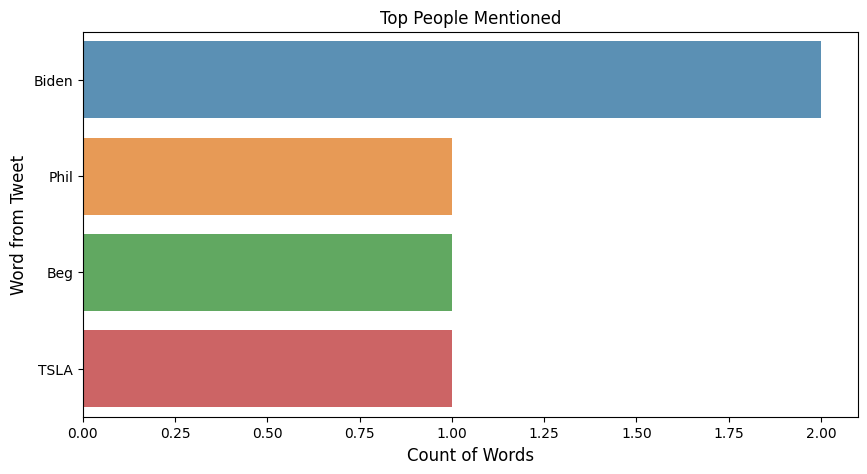

In [422]:
# simple plot that shows the top people mentioned

df = df7[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()